In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Create dataset

In [2]:
from sklearn.datasets.samples_generator import make_circles

# Create a circle datset
#     coor = coordinates
#         coor[0]: X
#         coor[1]: Y
#
#     label
#         label = 0: outer circle
#         label = 1: inner circle
coor, label = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

print(coor.shape)
print(label.shape)

(1000, 2)
(1000,)


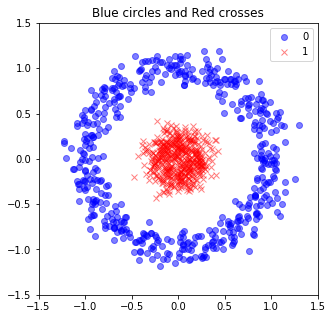

In [3]:
plt.figure(figsize=(5, 5))

plt.plot(coor[label==0, 0], coor[label==0, 1], 'ob', alpha=0.5)
plt.plot(coor[label==1, 0], coor[label==1, 1], 'xr', alpha=0.5)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses");

## Train Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [5]:
# Stack layers
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train
model.fit(coor, label, epochs=20)

Epoch 1/20
1000/1000 [==============================] - 1s 626us/step - loss: 0.6901 - acc: 0.5580
Epoch 2/20
1000/1000 [==============================] - 0s 176us/step - loss: 0.6667 - acc: 0.6240
Epoch 3/20
1000/1000 [==============================] - 0s 138us/step - loss: 0.6169 - acc: 0.7370
Epoch 4/20
1000/1000 [==============================] - 0s 149us/step - loss: 0.5310 - acc: 0.8180
Epoch 5/20
1000/1000 [==============================] - 0s 204us/step - loss: 0.4234 - acc: 0.8670
Epoch 6/20
1000/1000 [==============================] - 0s 147us/step - loss: 0.3159 - acc: 0.9310
Epoch 7/20
1000/1000 [==============================] - 0s 205us/step - loss: 0.2199 - acc: 0.9900
Epoch 8/20
1000/1000 [==============================] - 0s 408us/step - loss: 0.1571 - acc: 1.0000
Epoch 9/20
1000/1000 [==============================] - 0s 138us/step - loss: 0.1194 - acc: 1.0000
Epoch 10/20
1000/1000 [==============================] - 0s 156us/step - loss: 0.0947 - acc: 1.0000
Epoch 11/

## Create testset

In [7]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

ab

array([[-1.5 , -1.5 ],
       [-1.47, -1.5 ],
       [-1.44, -1.5 ],
       ...,
       [ 1.44,  1.5 ],
       [ 1.47,  1.5 ],
       [ 1.5 ,  1.5 ]])

In [8]:
c = model.predict(ab)
cc = c.reshape(aa.shape)

Text(0.5,1,'Blue circles and Red crosses')

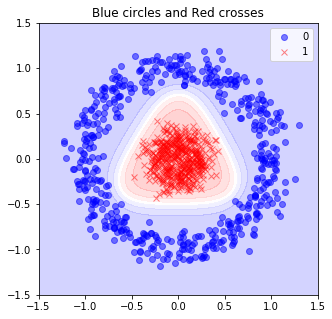

In [9]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)

plt.plot(coor[label==0, 0], coor[label==0, 1], 'ob', alpha=0.5)
plt.plot(coor[label==1, 0], coor[label==1, 1], 'xr', alpha=0.5)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")